In [ ]:
#delete rows and columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df=pd.read_csv("E:/python/data2/train.csv")
#df.shape
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head(6)
#df.info()
#no.of_missing_values
#df.isnull().sum()

In [ ]:
#white=impurity
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [ ]:
#percentage_of_missing_values
null_var=df.isnull().sum()/df.shape[0]*100
#more_then17
drop_col=null_var[null_var>17].keys()
drop_col

In [ ]:
#drop_col
df2=df.drop(columns=drop_col)
df2.shape

In [ ]:
sns.heatmap(df2.isnull())

In [ ]:
#delete_row_where_na
df3=df2.dropna()
df3.shape
#df3.isnull().sum()

In [ ]:
#sns.heatmap(df3.isnull())
#only_num_for_distplot
df3.select_dtypes(include=['int64','float64']).columns

In [ ]:
#before&after
sns.distplot(df['MSSubClass'])
sns.distplot(df3['MSSubClass'])

In [ ]:
#for_all_values
num_var=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']
plt.figure(figsize=(25,25))
for i,var in enumerate(num_var):
    plt.subplot(9,4,i+1)#rows_columns_index
    sns.distplot(df[var],bins= 20)
    sns.distplot(df3[var],bins=20)

In [ ]:
#plot_for_variable
df3.select_dtypes(include=['object']).columns

In [ ]:
#concat_2_df_and_change_column_name
#after_before_cleaning
pd.concat([df['MSZoning'].value_counts()/df.shape[0]*100,   
           df3['MSZoning'].value_counts()/df3.shape[0]*100],
          axis=1,keys=['MSZoning_org','MSZoning_clean'])

In [ ]:
#function_for _above
def cat(vari):
 return pd.concat([df['vari'].value_counts()/df.shape[0]*100,   
           df3['vari'].value_counts()/df3.shape[0]*100],
          axis=1,keys=[vari+'_org',vari+'clean'])

In [ ]:
#part2-#manually-global_constant-mean-median_mode

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("E:/python/data2/train.csv")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#df.head()
#df.info()
#df.isnull().sum()
#df.shape

In [ ]:
#more_than_20
null_var=df.isnull().sum()/df.shape[0]*100
drop_col=null_var[null_var>20].keys()
#drop_these
df2=df.drop(column=drop_col)

In [ ]:
#for_numeric_dataset
df3=df2.select_dtypes(include=['int64','float64'])
#sns.heatmap(df3.isnull())
#missing_values
#df3[df3.isnull().any(axis=1)]
#df3.isnull().sum()

In [ ]:
#all_columns_with_null_value
miss_col=[i for i in df3.columns if df3[i].isnull().sum()>0]
#check_mean_or_median
#mean-symentric_graph&median_for_asymentric_graph
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(miss_col):
    plt.subplot(2,2,i+1)
    sns.distplot(df3[var],bins=20,kde_kws={'linewidth':5,'color':'red'})

In [ ]:
#fillna_with_mean
df4=df3.fillna(df3.mean())
#comparing
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(miss_col):
    plt.subplot(2,2,i+1)
    sns.distplot(df3[var],bins=20,kde_kws={'linewidth':5,'color':'red'},label='original')
    sns.distplot(df4[var],bins=20,kde_kws={'linewidth':5,'color':'green'},label='New')
    plt.legend()

In [ ]:
#fillna_with_median
df5=df3.fillna(df3.median())
#comparing
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(miss_col):
    plt.subplot(2,2,i+1)
    sns.distplot(df3[var],bins=20,hist=False,kde_kws={'linewidth':8,'color':'red'},label='original')
    sns.distplot(df4[var],bins=20,hist=False,kde_kws={'linewidth':5,'color':'green'},label='New')
    sns.distplot(df5[var],bins=20,hist=False,kde_kws={'linewidth':3,'color':'yellow'},label='New2')
    plt.legend()


In [ ]:
#boxplot_#outliers
for i,var in enumerate(miss_col):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df4[var])
    plt.subplot(3,1,3)
    sns.boxplot(df5[var])

In [ ]:
#concat_all_3
df_concat=pd.concat([df3[miss_col],df4[miss_col],df5[miss_col]],axis=1)
#row_where_na
df_concat[df_concat.isnull().any(axis=1)]

In [ ]:
#part_3
#measure_of_central_tendency_for_each_class

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("E:/python/data2/train.csv")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#more_than_20
null_var=df.isnull().sum()/df.shape[0]*100
drop_col=null_var[null_var>20].keys()
#drop_these
df2=df.drop(columns=drop_col)
#num_dataset
df3=df2.select_dtypes(include=['int64','float64'])
#columns_with_na
miss_col=[i for i in df3.columns if df3[i].isnull().sum()>0]
#row_where_na
#df3[miss_col][df3[miss_col].isnull().any(axis=1)]

#fill_lotfrontage_with_lotconfig(for_reference)
df['LotConfig'].unique()
#df[df.loc[:,'LotConfig']=='Inside']["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig']=='Inside']["LotFrontage"].mean())

In [ ]:
df_copy = df.copy()
for var_class in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig'] == var_class]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig'] == var_class]["LotFrontage"].mean()))
#df_copy.isnull().sum()    

In [ ]:
df_copy = df.copy()
num_vars_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig','Exterior2nd','KitchenQual']
for cat_var, num_var_miss in zip(cat_vars,num_vars_miss):
    for var_class in df[cat_var].unique():
        df_copy.update(df[df.loc[:,cat_var] == var_class][num_var_miss].replace(np.nan,df[df.loc[:,cat_var] == var_class][num_var_miss].mean()))

Data Distribution

In [ ]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_vars_miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df_copy[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    plt.legend()

median

In [ ]:
df_copy_median = df.copy()
num_vars_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig','Exterior2nd','KitchenQual']
for cat_var, num_var_miss in zip(cat_vars,num_vars_miss):
    for var_class in df[cat_var].unique():
        df_copy.update(df[df.loc[:,cat_var] == var_class][num_var_miss].replace(np.nan,df[df.loc[:,cat_var] == var_class][num_var_miss].median()))

In [ ]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_vars_miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df_copy[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    sns.distplot(df_copy_median[var], bins=20, kde_kws={'linewidth':5, 'color':'blue'},label="Median",)
    plt.legend()

In [ ]:
#Boxplot
for i,var in enumerate(num_vars_miss):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df_copy[var])
    plt.subplot(3,1,3)
    sns.boxplot(df_copy_median[var])

Mode for categorical

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("E:/python/data2/train.csv")
cat_vars = df.select_dtypes(include='object')
cat_vars.isnull().sum()
miss_val_per = cat_vars.isnull().mean()*100
drop_vars=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
cat_vars.drop(columns=drop_vars, axis=1, inplace=True)
isnull_per=cat_vars.isnull().mean()*100
miss_vars = isnull_per[isnull_per >0].keys()
cat_vars['MasVnrType'].fillna(cat_vars['MasVnrType'].mode()[0]).value_counts()
cat_vars_copy= cat_vars.copy()
for var in miss_vars:
    cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])
cat_vars_copy.isnull().sum().sum()

Plotting

In [ ]:
plt.figure(figsize=(16,10))
for i,var in enumerate(miss_cols):
    plt.subplot(4,3,i+1)
    plt.hist(df2[var],label='Input')
    plt.hist(df[var].dropna(),label='Original')
    plt.legend()

In [ ]:
df.update(df2)
df.drop(columns=drop_col,inplace=True)
df.select_dtypes(include='object').isnull().sum()

# one hot encoding and dummy variables


In [ ]:
import pandas as pd 
tips_df = pd.read_csv("E:/python/data2/tips.csv")
dummy_df = pd.get_dummies(tips_df)
pd.get_dummies(tips_df, drop_first=True)

In [ ]:
#one_hot_encoder_with_scikit_learn
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder(sparse=False)
oh_enc_arr = oh_enc.fit_transform(tips_df[['sex','smoker','day','time']])
#oh_enc_arr
dummy_df.keys()
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=['sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Dinner', 'time_Lunch'])
oh_enc_df

# label_&_ordinal_encoding
#ordinal-can be ordered-eg-rating_of product
#nominal-cannot_be_measured-eg-python-java-c
#label on both cat_var
#ordinal_encoding on ordinal var

In [ ]:
#label_encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_rows",None)
df=pd.read_csv("E:/python/data2/train.csv")
df2=df[['KitchenQual','BldgType']]
le=LabelEncoder()
df2["bldgtype_enc"]=le.fit_transform(df2['BldgType'])
df2

In [ ]:
#ordinal
order_label={"Ex":4,"Gd":3,"TA":2,"Fa":1}
df2["kitchen_qual_enc"]=df2["KitchenQual"].map(order_label)
df2

## feature_scaling
## Standardizaion_&_normalization
#### standardization_rescales_feature_as_mean=0_and_standard_deviation=1
z=x-mean/deviation #z_score_normalization
use-clustering,PCA
#### normalization-rescale_feature_in_fixed_range_0_to_1
#also_called_as_min_max_scaling
use-image-processing_neural-network_k-nearset_negihbor

In [7]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df = sns.load_dataset("titanic")
df2 = df[['survived',"pclass",'age','parch']]
df3 = df2.fillna(df2.mean())
X = df3.drop("survived", axis = 1)
y = df3["survived"]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=51)
sc = StandardScaler()
sc.fit(X_train )
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


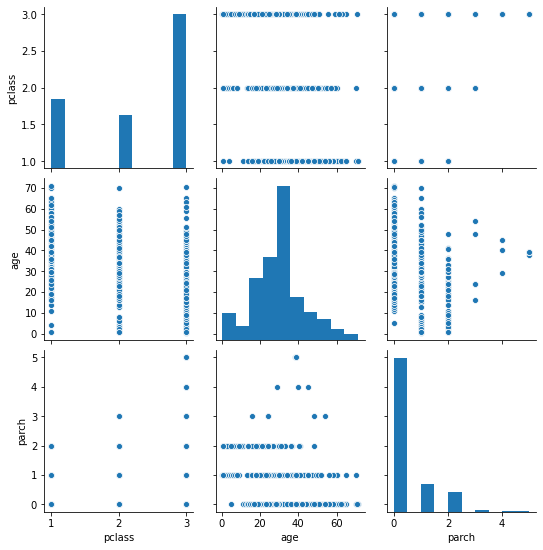

In [17]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)
X_train_sc=pd.DataFrame(X_train_sc,columns=["pclass",'age','parch'])
X_test_sc=pd.DataFrame(X_test_sc,columns=["pclass",'age','parch'])
X_train_sc.describe().round(2)
mmc=MinMaxScaler()
mmc.fit(X_train)
X_train_mmc=mmc.transform(X_train)
X_test_mmc=mmc.transform(X_test)
X_train_mmc
X_train_mmc=pd.DataFrame(X_train_mmc,columns=["pclass",'age','parch'])
X_test_mmc=pd.DataFrame(X_test_mmc,columns=["pclass",'age','parch'])
X_train_mmc.describe().round(2)
sns.pairplot(X_train)